In [2]:
import numpy as np
from pandas.io.parsers import read_csv
import matplotlib.pyplot as plt

# Leer datos

In [3]:
df = read_csv("data3.csv", header=None)
data = df.to_numpy()
X = data[:,:-1] #variables de entrada
y = data[:,-1]

print(y)
print(X)

[0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1.
 1. 1. 1. 1.]
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]
 [95.86155507 38.22527806]
 [75.01365839 30.60326323]
 [82.30705337 76.4819633 ]
 [69.36458876 97.71869196]
 [39.53833914 76.03681085]
 [53.97105215 89.20735014]
 [69.07014406 52.74046973]
 [67.94685548 46.67857411]
 [70.66150955 92.92713789]
 [76.97878373 47.57596365]
 [67.37202755 42.83843832]
 [89.67677575 65.79936593]
 [50.53478829 48.85581153]
 [34.21206098 44.2095286 ]
 [77.92409145 68.97235999]
 [62.27101367 69.95

# Visualizar datos

Numero de admitidos:  60
Numero de no admitidos:  40


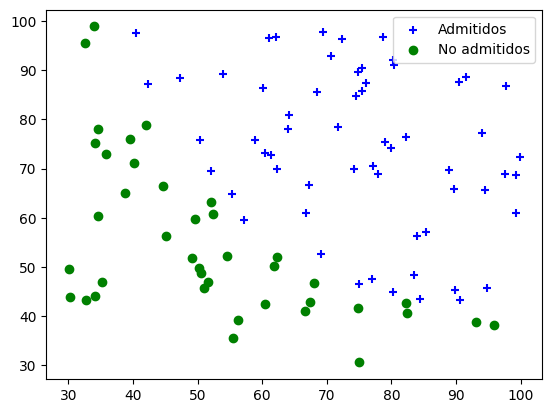

In [4]:
pos_admi = np.where(y == 1) # Indices de los alumnos admitidos
plt.scatter(X[pos_admi,0], X[pos_admi,1], marker="+", c="blue", label="Admitidos")

pos_no_admi = np.where(y==0)

print("Numero de admitidos: ", len(pos_admi[0]))
print("Numero de no admitidos: ", len(pos_no_admi[0]))

plt.scatter(X[pos_no_admi,0], X[pos_no_admi,1], marker="o", c="green", label="No admitidos")

plt.legend(loc='upper right')
plt.show()

# Funcion sigmoide

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))

In [6]:
print(sigmoid(23232))
print(sigmoid(1))
print(sigmoid(0))
print(sigmoid(-1))
print(sigmoid(-1000))
print(sigmoid(np.array([2, 3, 100])))

1.0
0.7310585786300049
0.5
0.2689414213699951
7.124576406741285e-218
[0.88079708 0.95257413 1.        ]


# Funcion de coste y gradiente del descenso

In [7]:
def linear_regression(x_i, w, b):
    return np.dot(x_i,w) + b

In [8]:
def logistic_regression(x_i, w, b):
    return sigmoid(linear_regression(x_i, w, b))

In [17]:
def cost_fun(x_i, y, w, b):
    y_pred = logistic_regression(x_i, w, b)
    return (-1/len(x_i)) * sum( (y * np.log(y_pred) + (1-y)*np.log(1-y_pred) ))

In [45]:
m, n = X.shape

w = np.zeros(n) # 2 variables [0, 0]
b = 0
NUMBER_OF_ITS = 10
ALFA = float(0.0001)

In [47]:
print(cost_fun(X, y, w, b))

0.693147180559946


In [48]:
print("Start: ")
print("w =",w, "b =", b)
print("Coste =", cost_fun(X, y, w, b))

for _ in range(NUMBER_OF_ITS):

    y_pred = logistic_regression(X, w, b)
    error =  y_pred - y

    for j in range(n):
        w[j] -= ALFA * (sum(error * X[:,j] )/ len(X))

    b -= ALFA * (sum(error) / len(X))

print("\nFinal : ")
print("w =",w, "b =", b)
print("Coste =", cost_fun(X, y, w, b))

Start: 
w = [0. 0.] b = 0
Coste = 0.693147180559946

Final : 
w = [0.00523576 0.00448532] b = 1.0662405882414039e-06
Coste = 0.632107145460611


# Evaluacion

In [49]:
y_pred = np.where(logistic_regression(X, w, b) >= 0.5, 1, 0)

good_pred = sum(y_pred == y)

print(good_pred/len(y))

0.6


In [28]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy = accuracy_score(y, y_pred)
print("Precisión del modelo: {:.2f}%".format(accuracy*100))

Precisión del modelo: 60.00%
